In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

In [2]:
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape(n_samples, -1)


In [3]:
import pandas as pd

Y=pd.get_dummies(digits.target).values
X=data

In [4]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
Y

array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False,  True, False]])

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((1437, 64), (360, 64), (1437, 10), (360, 10))

In [17]:

#모델 생성

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(32,input_shape=(X_train.shape[1],),activation='relu')) #imput_shape->입력층, 여기서는 64(X_train.shape[1])
model.add(Dense(25,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
#model.add(Dense(25,activation='relu'))
#model.add(Dense(15,activation='relu'))
model.add(Dense(10,activation='softmax')) #다층 퍼셉트론 -> softmax / 퍼셉트론 -> sigmoid, 출력층은 class갯수가 되도록

model.compile(Adam(learning_rate=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 25)                  │             825 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 20)                  │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 15)                  │             315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,900 (15.23 KB)

 Trainable params: 3,900 (15.23 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
import numpy as np
#x는 학습 데이터, y는 학습데이터 출력(타겟), epochs는 전체 학습데이터를 몇번할지, batch_size는 한번에 학습시킬 개수,validation_data는 검증시킬 데이터(모델 성능 평가)
model_history=model.fit(x=X_train, y=y_train, epochs=50, batch_size=100,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1081 - loss: 3.0165 - val_accuracy: 0.1583 - val_loss: 2.0195
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2810 - loss: 1.8444 - val_accuracy: 0.4194 - val_loss: 1.5174
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4963 - loss: 1.3645 - val_accuracy: 0.5889 - val_loss: 1.1035
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6452 - loss: 0.9626 - val_accuracy: 0.6333 - val_loss: 0.9474
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6921 - loss: 0.8248 - val_accuracy: 0.6389 - val_loss: 1.0021
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6973 - loss: 0.8760 - val_accuracy: 0.6639 - val_loss: 0.9278
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7262 - loss: 0.7542 - val_accuracy: 0.7083 - val_loss: 0.7327
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7486 - loss: 0.6567 - val_accuracy: 0.7083 - val_loss

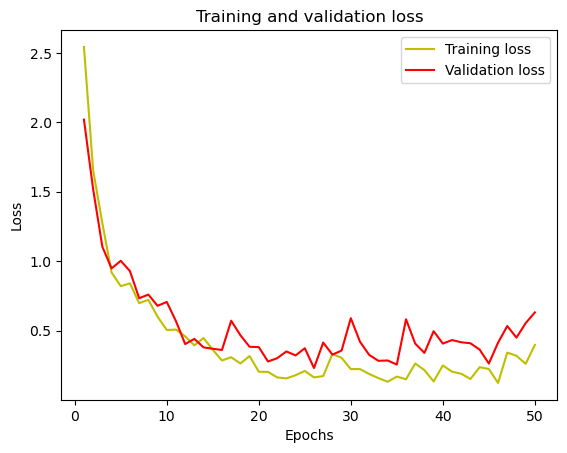

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

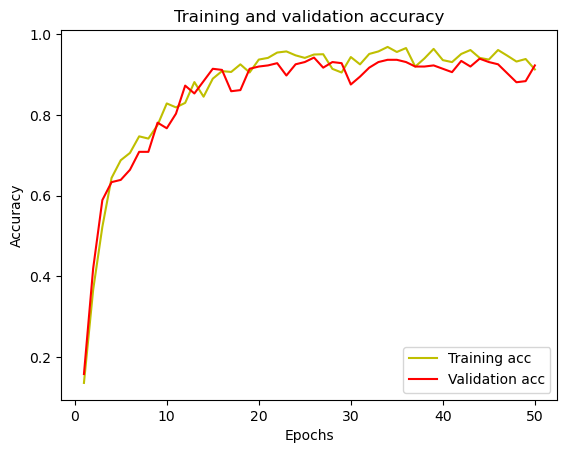

In [20]:

acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.80      0.94      0.87        35
           2       1.00      0.67      0.80        36
           3       0.90      0.97      0.93        29
           4       0.97      0.97      0.97        30
           5       0.97      0.97      0.97        40
           6       0.95      0.93      0.94        44
           7       1.00      0.92      0.96        39
           8       0.92      0.87      0.89        39
           9       0.82      1.00      0.90        41

    accuracy                           0.92       360
   macro avg       0.93      0.92      0.92       360
weighted avg       0.93      0.92      0.92       360

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  1  0  1  0  0  0]
 [ 1  3 24  3  0  0  1  0  3  1]
 [ 0  0  0 28  0  0  0  0  0  1]
 [ 0  0  0  0 29  0  0  0  0  1]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  3  0  0  0  0 41  0  0  0]
 [ 0  0  0